# Fame, Glory, Hollywood, and the Bizarre

So here we are trying to decide which of these assholes directors will walk the fame down memory lane by being christened as the best seller of all time. Currently we can see the top being dominated by the likes of Marvel and Paramount Studios. It's the fascinating tale of corporate greed and artistic freedom. On 1 hand we have god damn James Cameron producing mega hits left and right as if he's just throwing a dart and saying, well fuck me that's going to be a hit. How does he know? This is what we're trying to find out today. 

In [1]:
from IPython.display import HTML

HTML('<video controls src = "https://i.imgur.com/6a5UuUx.mp4" style="width:900px; loop autoplay">')

## Introduction

Straight from the horse's mouth
<br>We're going to make you an offer you can't refuse: a Kaggle competition!

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate." -[Kaggle](https://www.kaggle.com/c/tmdb-box-office-prediction).

Even though I watch a fuck metric of movies a year, I'm pretty sure I'm going to bomb this competition. I always rely on the shit people have done before me. e.g. [this guy](https://www.stat.berkeley.edu/~aldous/Research/Ugrad/Xiaoyu_Hu.pdf) and [this guy](https://arxiv.org/ftp/arxiv/papers/1804/1804.03565.pdf). Ah, internet. Lovely for information sharing. 

### Specs
This is what I'm using right now...
<br>CPU: Intel 8th Gen Core-i7 8550U
<br>RAM: 16GB 2100hz
<br>SSD: NVME M.2 512GB
<br>Brain: Lackluster, high on coffee

### Data
From my primitive idea what the data is saying beyond what [this](https://www.kaggle.com/c/tmdb-box-office-prediction/data) is saying. We got couple of interesting columns that may help us out. Genre is one, Cast is another. Potentialy [IMBD_ID](https://www.imdb.com/interfaces/) if we can figure how to webscrape the hell out of it. Another thing, I'm interested in knowing. Should we consider time as a component. As we go through the different portrayals in cinema, demographic taste changes. Not only are we more action focused, but so does the budget to film animation. These factors should be considered when we are modeling. Should we drop any movies prior to 2000. Titanic is an outlier that we can safely ignore. Something like "Gone with the Wind" and "Titanic" happened 2 times in 20 years. Unlike currently where we have 10 blockbusters within 5.

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/heesu/Downloads/boxoffice/train.csv") #simple load

In [3]:
df.head() #show me the money

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Seems like we got some NaNs here and there. Some nested dictionaries and some nested lists. Nothing that literal_eval can't handle. Unfortunately, there is a different issue altogther with the date_time format.

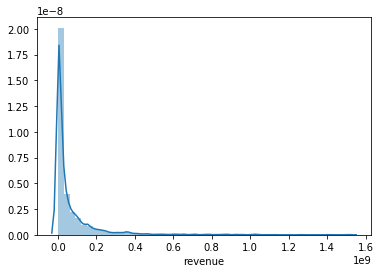

In [47]:
ax = sns.distplot(df.revenue, kde=True);
#ax.set_yscale('log')

Ewww, this graph is disgusting, we have some outliers here and there ut it seems like our revenue stream is heavily right skewed. A significant concentration on the left with a knee dip around the 0.4 mark. That translates to a possible gamma distributin for revenue. Basically similar to how the CERN photon competitiont works. There's more than likely chance you would find un interesting particles. But rarely you'll find blockbuster worthy stuff. 

In [3]:
#important to see if movie can gross exactly 0?
df[df.revenue == 0]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


Great, none of the movies have revenue of 0. This implies it's closely related to the gamma distribution which exhibit similar characteristics.

In [3]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month

In [5]:
np.unique(df.year.sort_values(ascending=True))

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2021, 2024, 2025, 2026, 2027, 2028,
       2030, 2031, 2032, 2033, 2035, 2036, 2038, 2039, 2040, 2042, 2043,
       2044, 2045, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055,
       2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066,
       2067, 2068], dtype=int64)

From the above sorted and unique list, we can see that there are some troubling dates. To state the obvious, I'm still living in the 2019 period when I'm writing this. Thus, anything that is beyond 2017 listed here is fake news. So basically, 2021 should be 1921. We shall correct those by parsing them to be 100 years prior.

In [4]:
df['year'] = df.year.apply(lambda x: x if x<=2019 else x-100)
np.unique(df.year.sort_values(ascending=True))

array([1921, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932, 1933, 1935,
       1936, 1938, 1939, 1940, 1942, 1943, 1944, 1945, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017], dtype=int64)

Voila~ fixed. TBH, it is bad practice rewrite over current column, but who the fuck cares about that right now. Just getting the data fixed is always a hassle.

## Time Is An Illusion
#### Starring the Great Depression & Other Shenanigans
Since we have all the time in our hands from 1921 to 2017, I have brought it upon myself to give a quick inspection to whether the seasonality effect exists for our little dataset. I have chosen to look at the modern era for a close inspection. And in couple of plots, I'll show why I did that

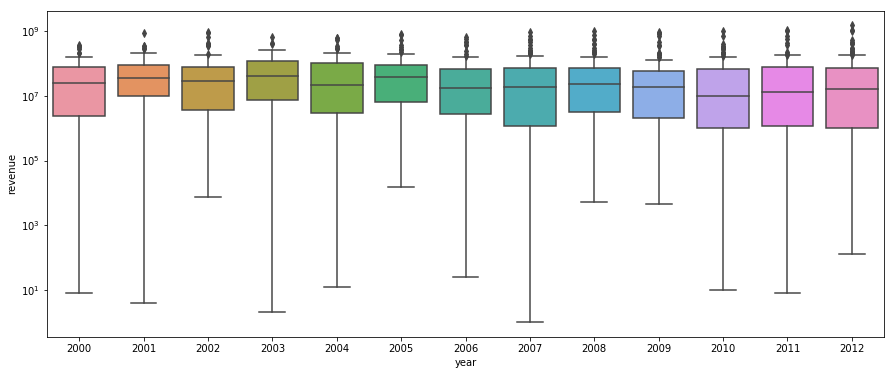

In [27]:
#Having fixed our year problem, let's take a look at year 2000 to 2012
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(data = df[(df.year < 2013) & (df.year >= 2000)], x = 'year', y = 'revenue');
ax.set_yscale('log')

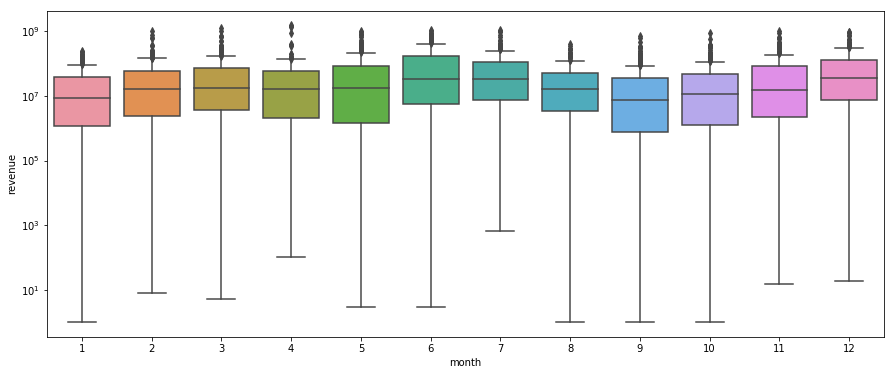

In [10]:
#How about months?
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(data = df, x = df.month, y = df.revenue);
ax.set_yscale('log')

Ok so far so good, now hit me up with the Great Depression era. Is it as bad as I imagined

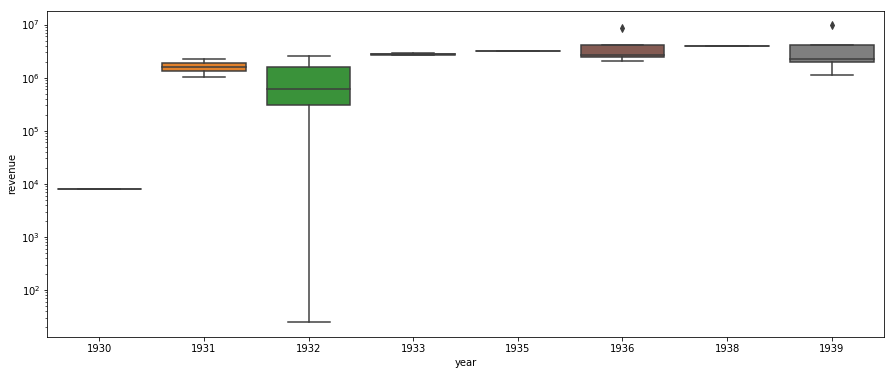

In [13]:
#what about in years, from 1930 to 1940
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(data = df[(df.year < 1940) & (df.year >= 1930)], x = 'year', y = 'revenue');
ax.set_yscale('log')

So it seems like the data is pretty sparse around the Great Depression era. Is this surprising? Not really, less money going around creates less opportunity for film directors to direct movies. Production companies come to a grinding halt.

In [15]:
len(df[(df.year < 1940) & (df.year >= 1930)]) #Yea there's only 18 movies produced in the great depression

18

This is in stark contrast compared to recent years where you can expect 18 movies within 6 months time span.

What I'm noticing here, is that there is only a marginal statistical significnance to months and actual revenue earned. The supposed seasonal effect of blockbuster hits may seem to be a myth. This hypothesis we can quickly test.

In [10]:
modern = df[(df.year < 2013) & (df.year >= 2000)] #creating modern dataset

In [21]:
modern['month'] = modern['month'].astype('category') #convert to category for futher in use
modern['year'] = modern['year'].astype('category') #ditto

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
model = sm.OLS(modern.revenue,modern.month)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                      38.795
Model:                            OLS   Adj. R-squared:                 38.825
Method:                 Least Squares   F-statistic:                    -1316.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        20:37:52   Log-Likelihood:                -25998.
No. Observations:                1283   AIC:                         5.200e+04
Df Residuals:                    1282   BIC:                         5.200e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month       9.201e+06   5.67e+05     16.220      0.000    8.09e+06    1.03e+07
==============================================================================
Omnibus:                     1082.154   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25766.848
Skew:                           3.902   Prob(JB):                         0.00
Kurtosis:                      23.521   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By all standards this regression model is not really robust. Can't say that it wasn't expected. We can check visually how this actually plays out. For instance here...

In [6]:
import statsmodels.formula.api as smf

In [18]:
mod = smf.ols('revenue~C(month)',data = modern).fit()

In [19]:
#ANOVA Testing
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
C(month),1.609207e+18,11.0,6.851422,2.657763e-11
Residual,2.713839e+19,1271.0,NaN,NaN


From the anova test above, we can see that months do play an integral part to the revenue generation. In other words, seasonality is statistically significant at P<0.05 level. For the observant, I have included the outerliers to be in the monthly data. This allows for block busters such as Avengers and Fast and Furious to skew the data. The mean would be higher than normal. Does this make sense? I would say yes. This would capture exactly what we are looking for. Which months are more inclined to release a blockbuster movie. Is it January, Feb, etc. 

Since we know that seasonality plays an integral part, should we test for the heteroscedasticty of the yearly data? Does the variance and distribution of movie revenue change per year? 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


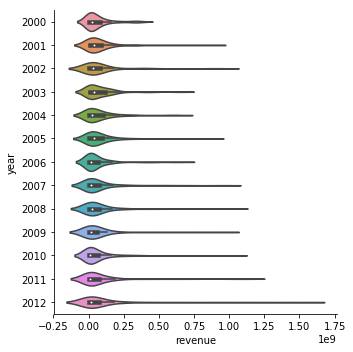

In [29]:
#Having fixed our year problem, let's take a look at year 2000 to 2012
sns.catplot(y='year',x='revenue',kind='violin',
            data=modern)

Although, not the prettiest of plots, it gives me a good understanding that the variance of revenue throughout time is not constant. As the years go on, the revenue experience a gradual change. How do we deal with this kind of heteroscedasticity is up to the feature engineering later. I might try the regime switching model I have mentioned earlier. 

## The Trickle Down Economy
#### Starring the Monopolies, Reagonomics, & My Poor Understanding of Movie Budgets

So here we are after analyzing some time related data. We are now into the budget territory. The question is simple.
<br>Does higher budget indicate higher revenue? 
<br>I worry that my simple question may miss the bigger picture (hehe) of the what truly goes on behind production companies. For instance, Life of Pi had a retarded sum for the budget just to animate the damn tiger. Sure they did a phenomenal job but it didn't directly correlate with revenue. As the years go by, we are seeing an insurgence of animated and cgi related movies that may artificially increase the budget to incorproate salaries and expenses. On the other hand, practical effect guru, Steven Spielberg with his Jurassic Park wunderkind got immense revenue inflow with minimal CGI added. 

But It's always a no-brainer to check what's going on. We shall first perform a correlation test. However one of the primary assumption for correlation is the linearity of the 2 variables. Without it, it's doesn't bear too much fruit

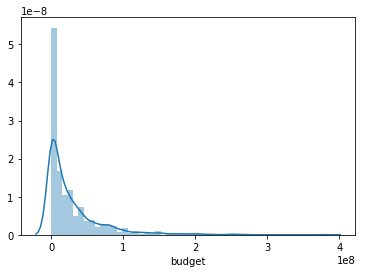

In [32]:
#We already know revenue is gamma distribution. Let's check budget
ax = sns.distplot(modern.budget, kde=True);
#ax.set_yscale('log')

Well well well, surely you're joking. Seems like we got another potential gamma distribution in our hands. Gamma to Gamma might actually quite well for our purposes. I can check the 2 distribution against each other. For instance...

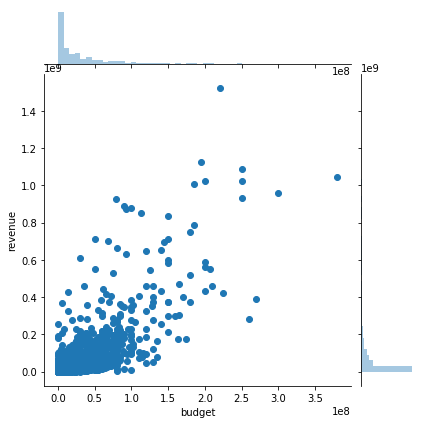

In [34]:
g=sns.jointplot(x='budget', y='revenue', data = modern) #joint distplot

It seems we have better luck, not scaling the revenue for a linear relationship. We see a concentration of revenue stuck in the near 0 budget while all the higher performing films have higher budget. This can be classified whether it's due to films having better production quality.

In [38]:
#Let's perform a simple regression test
budget_mod = sm.OLS(modern.revenue,modern.budget).fit()
budget_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                      16.006
Model:                            OLS   Adj. R-squared:                 16.018
Method:                 Least Squares   F-statistic:                    -1367.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        21:13:17   Log-Likelihood:                -25406.
No. Observations:                1283   AIC:                         5.081e+04
Df Residuals:                    1282   BIC:                         5.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         2.7385      0.054     51.084      0.000       2.633       2.844
==============================================================================
Omnibus:                      900.025   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22228.945
Skew:                           2.918   Prob(JB):                         0.00
Kurtosis:                      22.539   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A pretty wild R-sq just like earlier. I don't know what 1600% exactly means but clearly something fucked up. That's for sure. I don't think that necessarily means 16% either. Since we know that the 2 distributions are gamma linked why don't we try a quick GLM for show

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


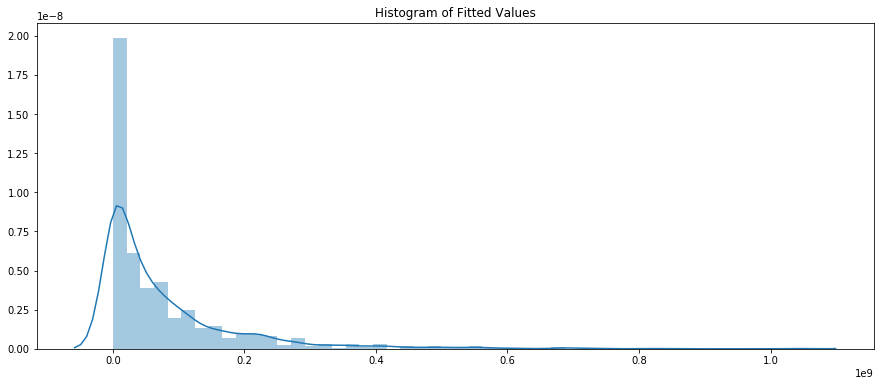

In [60]:
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
sns.distplot(budget_mod.fittedvalues, kde=True)
ax.set_title('Histogram of Fitted Values');

It does a decent job of keeping the shape of the regular distribution but fails to capture other subtleties. How about if we were to change the link to a Gamma Distribution like observed before.

In [104]:
y = modern.revenue
X = modern.budget
X = sm.add_constant(X)
gam_budget = sm.GLM(y, X, family=sm.families.Gamma()).fit()
gam_budget.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                revenue   No. Observations:                 1283
Model:                            GLM   Df Residuals:                     1281
Model Family:                   Gamma   Df Model:                            1
Link Function:          inverse_power   Scale:                          3.2832
Method:                          IRLS   Log-Likelihood:                -23629.
Date:                Fri, 15 Mar 2019   Deviance:                       5168.7
Time:                        23:43:03   Pearson chi2:                 4.21e+03
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.414e-08   1.22e-09     19.716      0.000    2.17e-08    2.65e-08
budget     -1.201e-16   6.15e-18    -19.518      0.000   -1.32e-16   -1.08e-16
==============================================================================
"""

For most, the coefficients listed from the result summary my not mean much but it's imperative to remember that

$$E[y|x] = exp(\alpha + \beta*x) = \hat{y}$$

For the interested. It simply means the for the expected y value, the coefficient experiences is raised the the e power. So -1.2e-16 is really 0.999

<br>So now that's very fascinating for anyone who caught on. On a coefficient basis, nearly every dollar raised in budget equates to a dollar raised in revenue. Does the residual hold though? 

In [98]:
(gam_budget.resid_response).describe()

count    1.283000e+03
mean    -2.019305e-06
std      4.609004e+08
min     -7.971730e+09
25%     -4.035664e+07
50%     -2.523686e+07
75%      2.807554e+07
max      1.957548e+09
dtype: float64

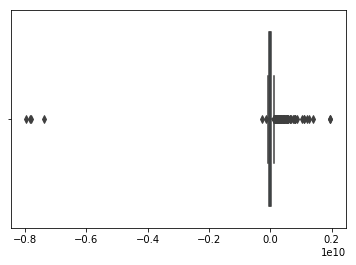

In [105]:
sns.boxplot(gam_budget.resid_response)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


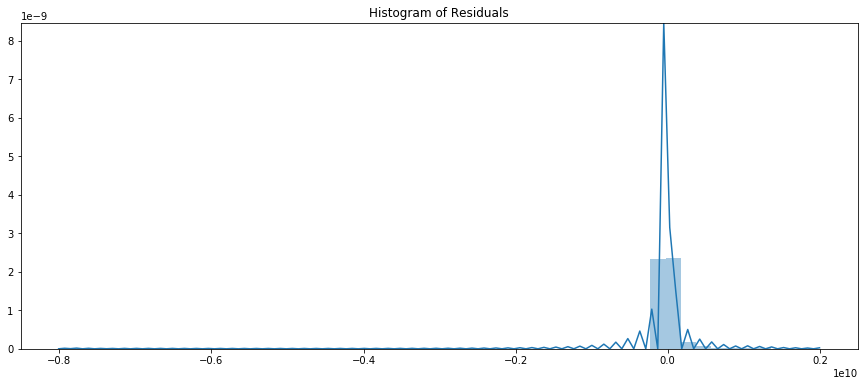

In [93]:
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
resid = gam_budget.resid_response
sns.distplot(resid, kde=True)
ax.set_title('Histogram of Residuals');

OH! It's not as ugly as I thought. It's relatively normal..as far as I was honesty expecting this. But really this is quite the nuisance though in terms of standardized errors, we have a couple that span around 4$\sigma$ away from the mean. We can only hope that these are for smaller revenue movies rather than the big ones.

In [100]:
y = modern.revenue
X = modern.budget
X = sm.add_constant(X)
gam_budget = sm.GLM(y, X, family=sm.families.Gaussian()).fit()
gam_budget.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                revenue   No. Observations:                 1283
Model:                            GLM   Df Residuals:                     1281
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      9.2792e+15
Method:                          IRLS   Log-Likelihood:                -25405.
Date:                Fri, 15 Mar 2019   Deviance:                   1.1887e+19
Time:                        23:39:46   Pearson chi2:                 1.19e+19
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.627e+06   3.26e+06     -0.806      0.420   -9.01e+06    3.76e+06
budget         2.7680      0.065     42.627      0.000       2.641       2.895
==============================================================================
"""

In [101]:
gam_budget.resid_response.describe()

count    1.283000e+03
mean    -3.396025e-08
std      9.629086e+07
min     -4.329217e+08
25%     -2.980962e+07
50%      1.201359e+06
75%      1.122886e+07
max      9.132183e+08
dtype: float64

Worst case on the bottom quartile, I'm off by \\$2M and the top quartile I'm off by at least \\$1M. This is not looking quite good for this model. If we were to boxplot this

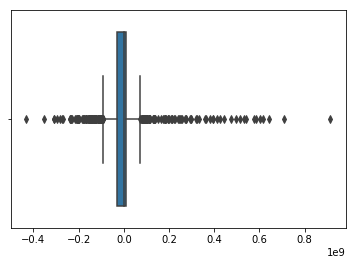

In [103]:
sns.boxplot(gam_budget.resid_response)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


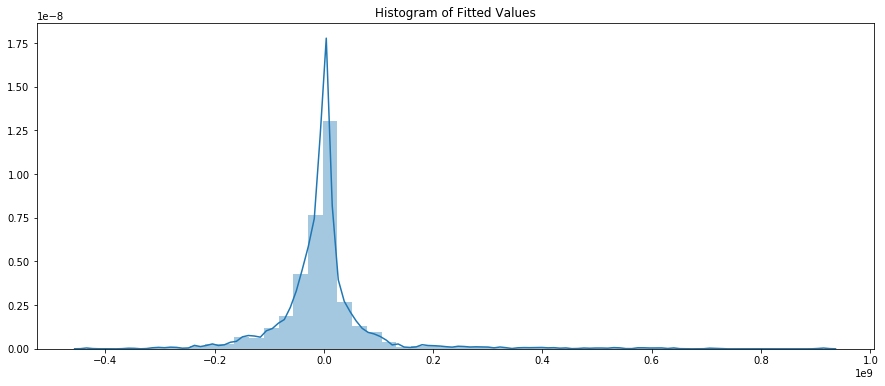

In [102]:
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
sns.distplot(gam_budget.resid_response, kde=True)
ax.set_title('Histogram of Fitted Values');

In [68]:
sm.GLM.get_distribution(params = modern.revenue)

TypeError: get_distribution() missing 1 required positional argument: 'self'

In [11]:
[item['name'] for item in list(literal_eval(df.genres[1]))]

['Comedy', 'Drama', 'Family', 'Romance']